In [62]:
##import libraries
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [3]:
## read_data
data=pd.read_csv("movies.csv")
## drop index column 
data.drop('index',axis=1,inplace=True)
## view first five rows 
data.head()

,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,The Godfather,(1972),R,175 min,"Crime, Drama",9.2,"1,860,471",$134.97M
1,The Silence of the Lambs,(1991),R,118 min,"Crime, Drama, Thriller",8.6,"1,435,344",$130.74M
2,Star Wars: Episode V - The Empire Strikes Back,(1980),PG,124 min,"Action, Adventure, Fantasy",8.7,"1,294,805",$290.48M
3,The Shawshank Redemption,(1994),R,142 min,Drama,9.3,"2,683,302",$28.34M
4,The Shining,(1980),R,146 min,"Drama, Horror",8.4,"1,025,560",$44.02M


In [6]:
## cheaking dtype 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_name       99 non-null     object 
 1   year_of_release  99 non-null     object 
 2   category         99 non-null     object 
 3   run_time         99 non-null     object 
 4   genre            99 non-null     object 
 5   imdb_rating      99 non-null     float64
 6   votes            99 non-null     object 
 7   gross_total      98 non-null     object 
dtypes: float64(1), object(7)
memory usage: 6.3+ KB


In [8]:
## statistical view 
data.describe()

,imdb_rating
count,99.000000
mean,8.348485
std,0.368772
min,7.200000
25%,8.100000
50%,8.300000
75%,8.600000
max,9.300000


In [10]:
## data clean and change dtype 
data['year_of_release']=data['year_of_release'].str.replace(r'[()]','')
data['votes']=data['votes'].str.replace(r'\,','')
data['gross_total']=data['gross_total'].str.replace(r'\$','')
data['gross_total']=data['gross_total'].str.replace(r'[A-Z]','')
data['run_time']=data['run_time'].str.replace(r'[a-z]+','')
data['gross_total']=data['gross_total'].astype('float')
data['run_time']=data['run_time'].astype('int')
data['votes']=data['votes'].astype('int')
data['year_of_release']=data['year_of_release'].astype('int')

C:\Users\kabir\AppData\Local\Temp\ipykernel_17672\2600898697.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['year_of_release']=data['year_of_release'].str.replace(r'[()]','')
C:\Users\kabir\AppData\Local\Temp\ipykernel_17672\2600898697.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['votes']=data['votes'].str.replace(r'\,','')
C:\Users\kabir\AppData\Local\Temp\ipykernel_17672\2600898697.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['gross_total']=data['gross_total'].str.replace(r'\$','')
C:\Users\kabir\AppData\Local\Temp\ipykernel_17672\2600898697.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['gross_total']=data['gross_total'].str.replace(r'[A-Z]','')
C:\Users\kabir\AppData\Local\Temp\ipykernel_17672\2600898697.py:5: FutureWarning: The default value

In [12]:
## cheaking dtype again 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_name       99 non-null     object 
 1   year_of_release  99 non-null     int32  
 2   category         99 non-null     object 
 3   run_time         99 non-null     int32  
 4   genre            99 non-null     object 
 5   imdb_rating      99 non-null     float64
 6   votes            99 non-null     int32  
 7   gross_total      98 non-null     float64
dtypes: float64(2), int32(3), object(3)
memory usage: 5.2+ KB


# EDA

# Most_common_category

<AxesSubplot: title={'center': 'Most common category'}, ylabel='category'>

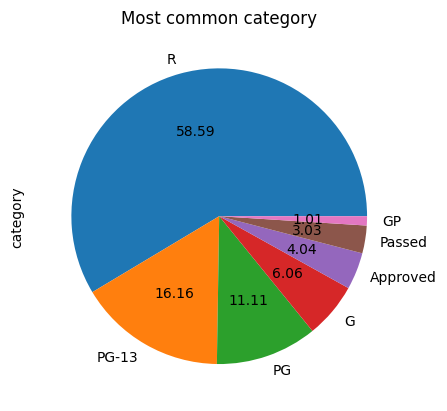

In [25]:
data.category.value_counts().plot(title='Most common category',kind='pie',autopct='%1.2f')

# Most_common_geners

<AxesSubplot: title={'center': 'Most common gener'}, ylabel='genre'>

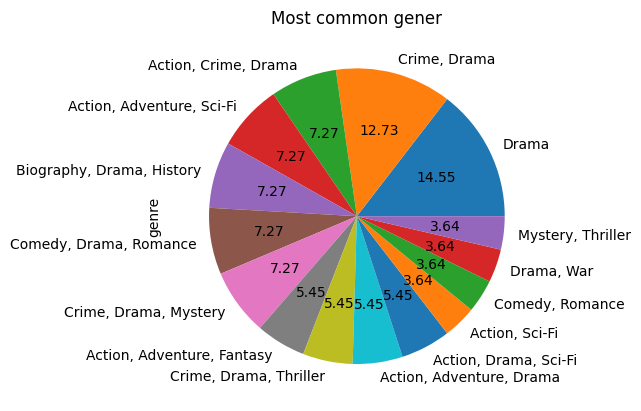

In [27]:
data.genre.value_counts().head(15).plot(kind='pie',title='Most common gener',autopct='%1.2f')

# Movie VS Rating

In [ ]:
# plt.figure(figsize=(15,6))
sns.countplot(data=data,x='imdb_rating')

# Top 10 movie with high gross rate 

In [50]:
tp_10=data[['gross_total','movie_name']].sort_values(ascending=False,by='gross_total').head(10)
fig = px.pie(tp_10, values='gross_total', names='movie_name', title='Population of European continent')
fig.show()

<Figure size 1500x600 with 0 Axes>

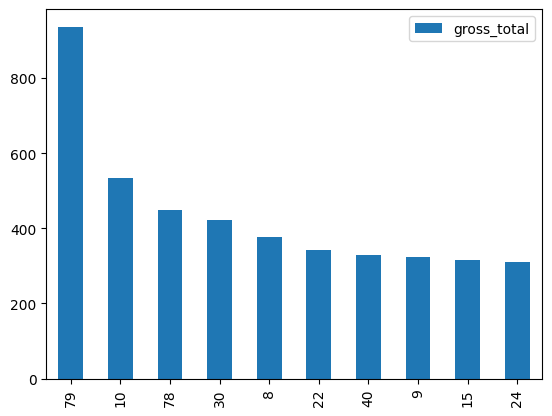

In [56]:
plt.figure(figsize=(15,6))
tp_10.plot(kind='bar')
plt.legend()
plt.show()

# Rating vs Category

In [60]:
fig=px.histogram(data,x='imdb_rating',color='category')
fig.show()

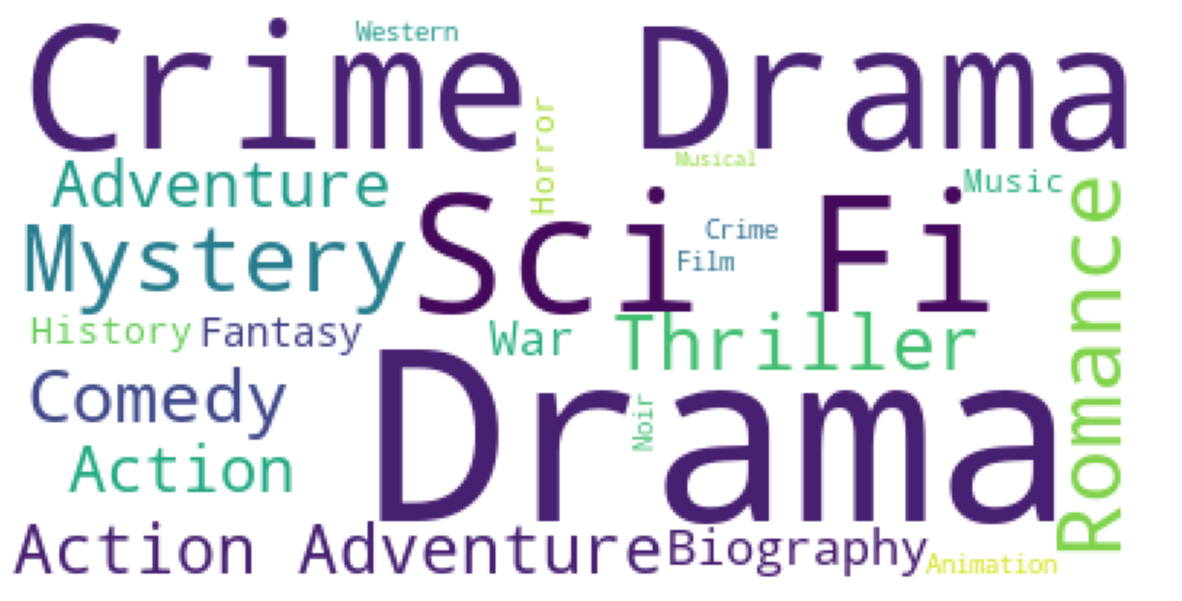

In [74]:
stop_word=set(STOPWORDS)

text=" ".join(data['genre'])
word_cloud=WordCloud(background_color='white',stopwords=stop_word,random_state=42,max_words=50).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

# Cheaking gross total yearly

In [82]:
fig=px.ecdf(data,x='year_of_release',y='gross_total')
fig.show()

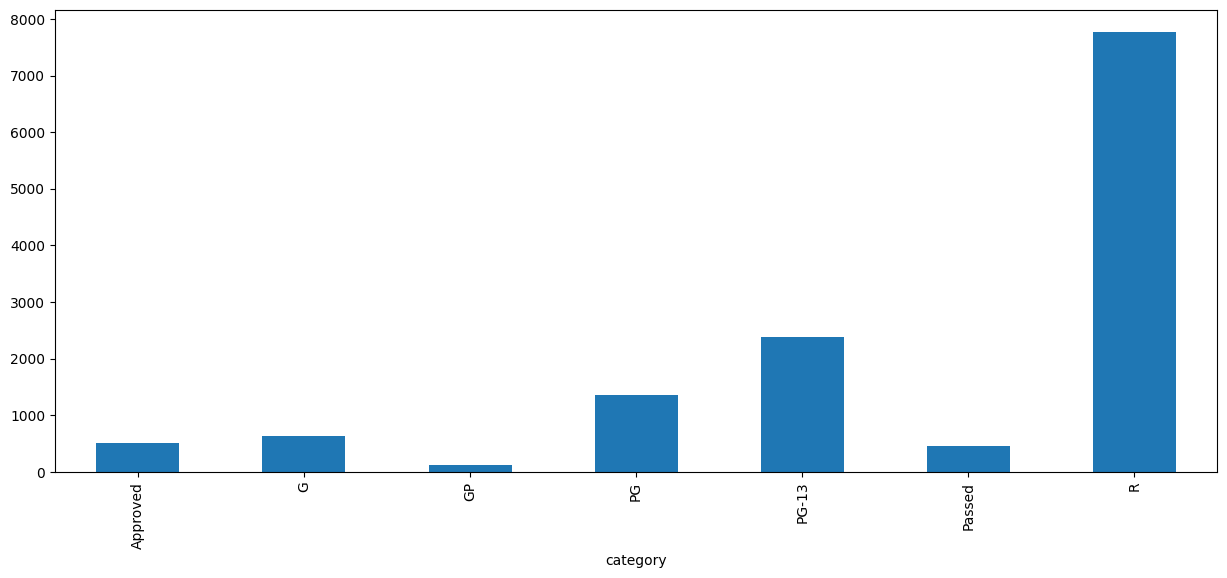

In [92]:
plt.figure(figsize=(15,6))
data.groupby('category')['run_time'].sum().plot(kind='bar')
plt.show()

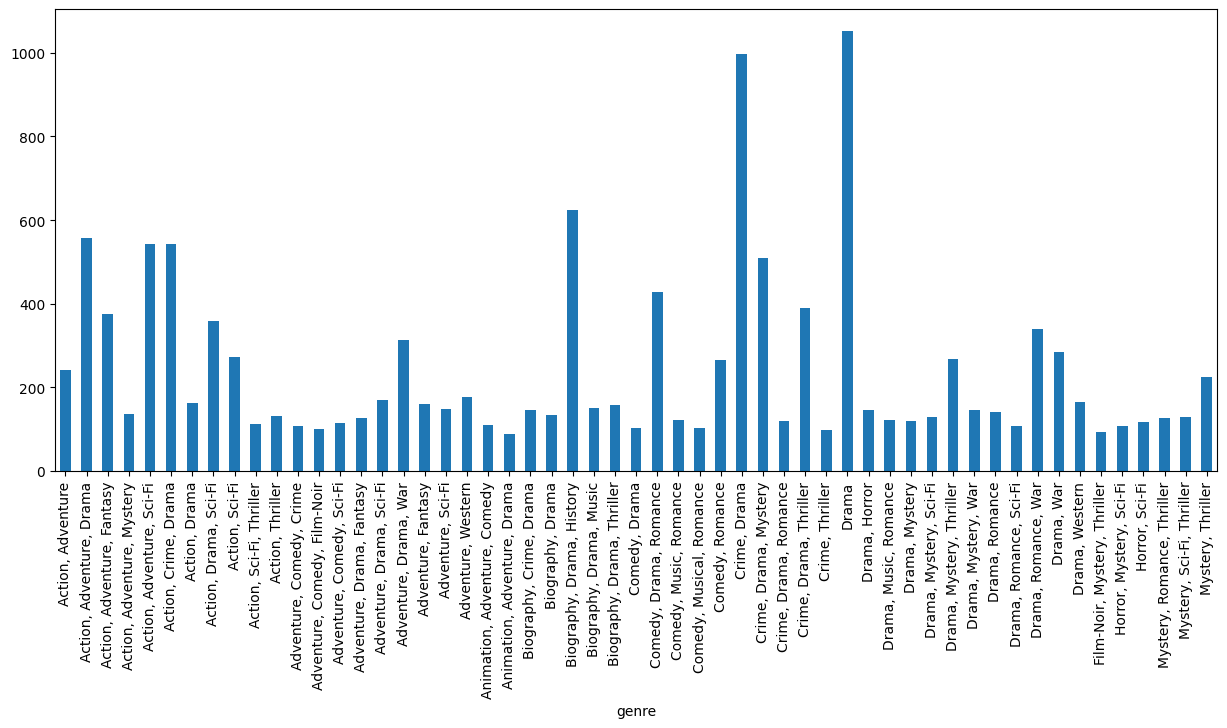

In [93]:
plt.figure(figsize=(15,6))
data.groupby('genre')['run_time'].sum().plot(kind='bar')
plt.show()

# Thanks for reading till the end ! If you liked the EDA, Model Training, Model Evaluation and Comparison, Predtictions
pls do Upvote👍 and give some remarks/advice if you feels some things need to be added